In [46]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# import data

crime_df = pd.read_csv('Chicago_Crimes_2012_to_2017.csv')

print(crime_df.shape)

(1048575, 23)


In [48]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
Unnamed: 0              1048575 non-null int64
ID                      1048575 non-null int64
Case Number             1048575 non-null object
Date                    1048575 non-null object
Block                   1048575 non-null object
IUCR                    1048575 non-null object
Primary Type            1048575 non-null object
Description             1048575 non-null object
Location Description    1047927 non-null object
Arrest                  1048575 non-null bool
Domestic                1048575 non-null bool
Beat                    1048575 non-null int64
District                1048574 non-null float64
Ward                    1048562 non-null float64
Community Area          1048535 non-null float64
FBI Code                1048575 non-null object
X Coordinate            1039870 non-null float64
Y Coordinate            1039870 non-null float64
Year                    1

In [49]:
crime_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,5/3/2016 23:40,013XX S SAWYER AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,5/10/2016 15:56,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,5/3/2016 21:40,061XX S DREXEL AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,5/10/2016 15:56,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,5/3/2016 23:31,053XX W CHICAGO AVE,470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,5/10/2016 15:56,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,5/3/2016 22:10,049XX W FULTON ST,460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,5/10/2016 15:56,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,5/3/2016 22:00,003XX N LOTUS AVE,820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,6,1139890.0,1901675.0,2016,5/10/2016 15:56,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [50]:
# how many missing values per column.
miss_val_df = pd.DataFrame(crime_df.isnull().sum())
miss_val_df['Missing Percentage'] = (miss_val_df[0]/len(crime_df))*100
miss_val_df = miss_val_df.rename(columns={0:'Missing Values'})
miss_val_df

,Missing Values,Missing Percentage
Unnamed: 0,0,0.000000
ID,0,0.000000
Case Number,0,0.000000
Date,0,0.000000
Block,0,0.000000
IUCR,0,0.000000
Primary Type,0,0.000000
Description,0,0.000000
Location Description,648,0.061798
Arrest,0,0.000000


In [51]:
crime_df['Date'] = pd.to_datetime(crime_df['Date'])
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
Unnamed: 0              1048575 non-null int64
ID                      1048575 non-null int64
Case Number             1048575 non-null object
Date                    1048575 non-null datetime64[ns]
Block                   1048575 non-null object
IUCR                    1048575 non-null object
Primary Type            1048575 non-null object
Description             1048575 non-null object
Location Description    1047927 non-null object
Arrest                  1048575 non-null bool
Domestic                1048575 non-null bool
Beat                    1048575 non-null int64
District                1048574 non-null float64
Ward                    1048562 non-null float64
Community Area          1048535 non-null float64
FBI Code                1048575 non-null object
X Coordinate            1039870 non-null float64
Y Coordinate            1039870 non-null float64
Year             

In [52]:
# making date column index for analysis
crime_df.index = pd.DatetimeIndex(crime_df['Date'])
crime_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2016-05-03 23:40:00,3,10508693,HZ250496,2016-05-03 23:40:00,013XX S SAWYER AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,5/10/2016 15:56,41.864073,-87.706819,"(41.864073157, -87.706818608)"
2016-05-03 21:40:00,89,10508695,HZ250409,2016-05-03 21:40:00,061XX S DREXEL AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,5/10/2016 15:56,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2016-05-03 23:31:00,197,10508697,HZ250503,2016-05-03 23:31:00,053XX W CHICAGO AVE,470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,5/10/2016 15:56,41.894908,-87.758372,"(41.894908283, -87.758371958)"
2016-05-03 22:10:00,673,10508698,HZ250424,2016-05-03 22:10:00,049XX W FULTON ST,460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,5/10/2016 15:56,41.885687,-87.749516,"(41.885686845, -87.749515983)"
2016-05-03 22:00:00,911,10508699,HZ250455,2016-05-03 22:00:00,003XX N LOTUS AVE,820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,6,1139890.0,1901675.0,2016,5/10/2016 15:56,41.886297,-87.761751,"(41.886297242, -87.761750709)"


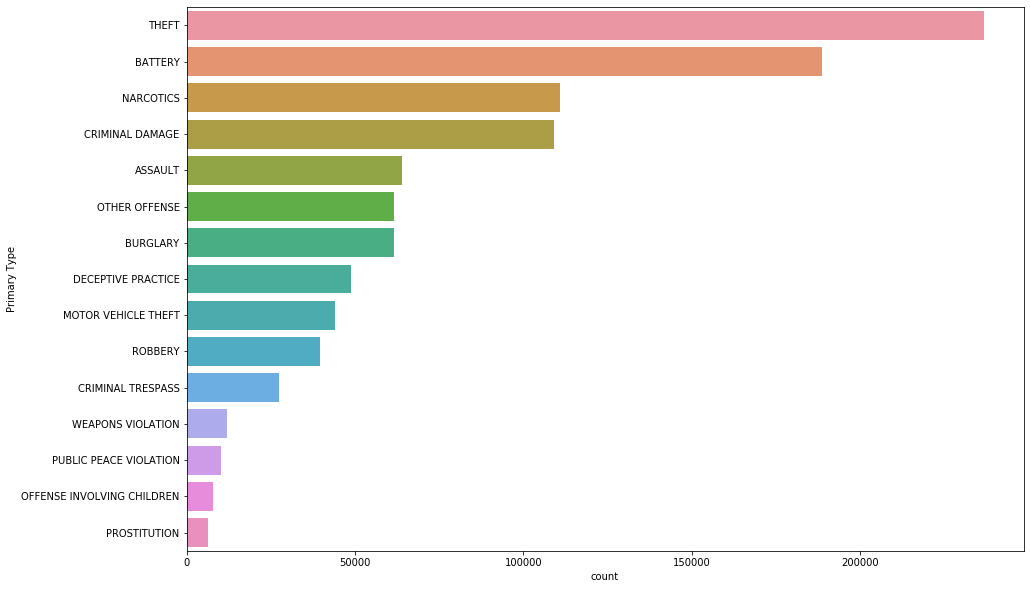

In [53]:
# Top 15 primary crime types.
columns = crime_df['Primary Type'].value_counts().iloc[:15].index
plt.figure(figsize=(15,10))
sns.countplot(y='Primary Type', data=crime_df, order=columns)
plt.show()

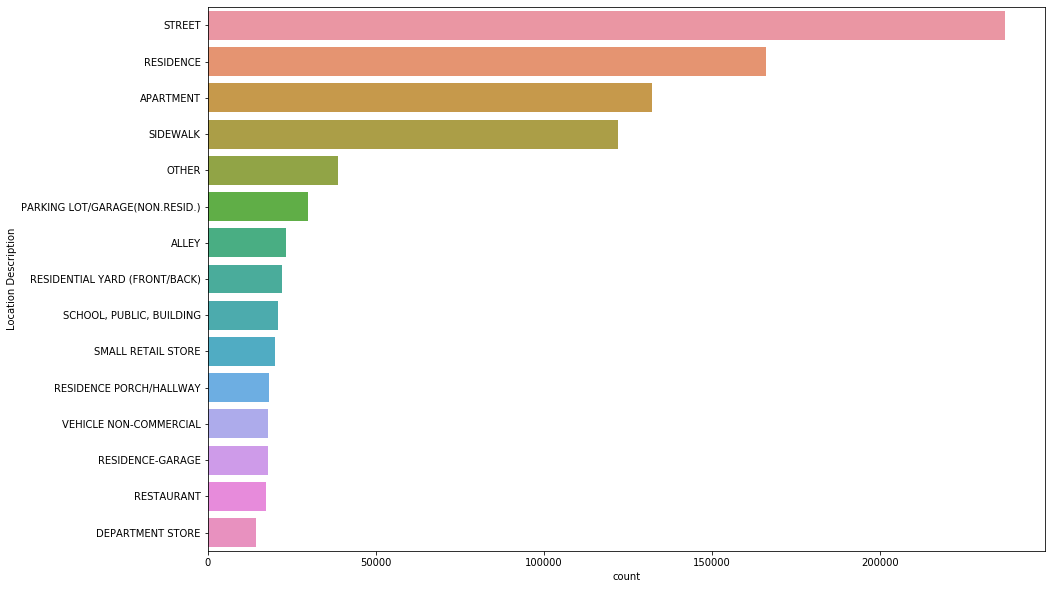

In [54]:
# Top 15 locations where crime occurred.
plt.figure(figsize=(15,10))
sns.countplot(y='Location Description', data=crime_df, order=crime_df['Location Description'].value_counts().iloc[:15].index)
plt.show()

In [55]:
# crimes per year
crime_df = crime_df.set_index(pd.to_datetime(crime_df['Date']))
crimes_per_year = crime_df.resample('Y').size()
crimes_per_year

Date
2012-12-31    334715
2013-12-31    305738
2014-12-31    273222
2015-12-31    109685
2016-12-31     25215
Freq: A-DEC, dtype: int64

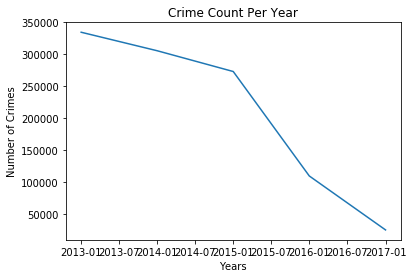

In [56]:
plt.plot(crimes_per_year)
plt.title("Crime Count Per Year")
plt.xlabel("Years")
plt.ylabel("Number of Crimes")
plt.show()

In [57]:
# crimes per month
crimes_per_month = crime_df.resample('M').size()
crimes_per_month

Date
2012-01-31    26083
2012-02-29    23793
2012-03-31    28457
2012-04-30    27100
2012-05-31    29987
2012-06-30    30976
2012-07-31    31853
2012-08-31    29918
2012-09-30    27643
2012-10-31    27848
2012-11-30    25935
2012-12-31    25122
2013-01-31    25252
2013-02-28    21330
2013-03-31    24859
2013-04-30    25435
2013-05-31    27878
2013-06-30    27233
2013-07-31    28502
2013-08-31    28525
2013-09-30    26213
2013-10-31    25348
2013-11-30    23432
2013-12-31    21731
2014-01-31    19718
2014-02-28    17912
2014-03-31    22054
2014-04-30    22741
2014-05-31    24718
2014-06-30    25240
2014-07-31    26388
2014-08-31    25673
2014-09-30    23684
2014-10-31    23780
2014-11-30    20555
2014-12-31    20759
2015-01-31    20125
2015-02-28    15871
2015-03-31    21013
2015-04-30    20960
2015-05-31    22549
2015-06-30     8599
2015-07-31       93
2015-08-31       76
2015-09-30      197
2015-10-31       59
2015-11-30       54
2015-12-31       89
2016-01-31     2508
2016-02-29     

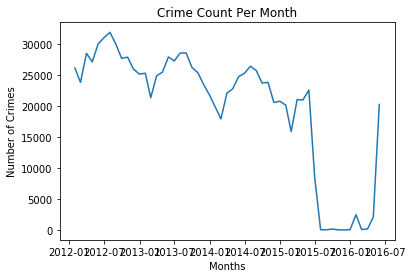

In [58]:
plt.plot(crimes_per_month)
plt.title("Crime Count Per Month")
plt.xlabel("Months")
plt.ylabel("Number of Crimes")
plt.show()

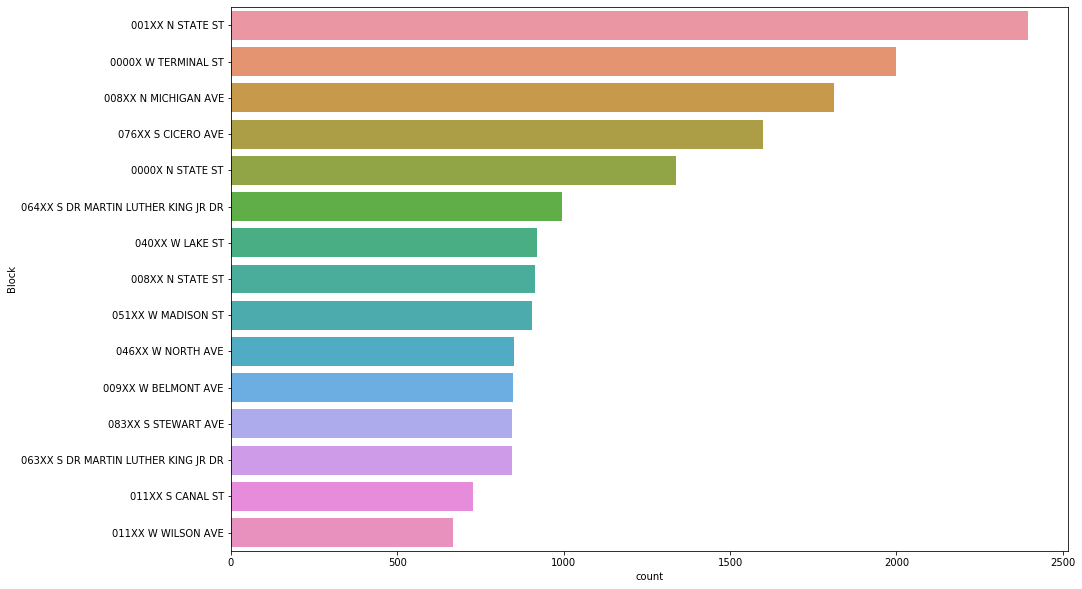

In [59]:
# Top 15 Blocks
plt.figure(figsize=(15,10))
sns.countplot(y='Block', data=crime_df, order=crime_df['Block'].value_counts().iloc[:15].index)
plt.show()